# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

<p><b>Estudiante:</b> José Quiros</p>

## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

In [139]:
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

In [140]:
#Generar el diccionario para el corpus
def generar_diccionario(corpus):
    diccionario = set()

    for doc in documents:
        for palabra in doc.strip(".").lower().split(" "):
            diccionario.add(palabra)
    
    return diccionario

diccionario = generar_diccionario(documents)
print (diccionario)
print(list(diccionario))
print ("Cantidad de términos: ", len(diccionario))

{'jugaron', 'escondió', 'cómoda', 'de', 'la', 'gato', 'se', 'estaba', 'cama', 'jardín', 'el', 'importante', 'debajo', 'limpia', 'y', 'limpieza', 'es', 'perro', 'en', 'del'}
['jugaron', 'escondió', 'cómoda', 'de', 'la', 'gato', 'se', 'estaba', 'cama', 'jardín', 'el', 'importante', 'debajo', 'limpia', 'y', 'limpieza', 'es', 'perro', 'en', 'del']
Cantidad de términos:  20


In [141]:
# generar los labels para los documentos
def generar_labels(documents, key="doc"):
    doc_labels = []
    if len(documents)>1:
        for i in range(len(documents)):
            val = key + str(i+1)
            doc_labels.append(val)
    elif len(documents)==1: 
        doc_labels.append(key)
    return doc_labels

doc_labels = generar_labels(documents, key="doc")
print(doc_labels)

['doc1', 'doc2', 'doc3', 'doc4']


In [142]:
# Generar la matriz termino documento 
# Términos -> filas, Docs -> Columnas 

def generar_matriz_termino_documento(documents, diccionario, columns_labels):
    import pandas as pd

    matriz_termino_documento = [] 

    for termino in diccionario:
        fila = []
        for doc in documents:
            cantidad_termino = doc.strip(".").lower().split(" ").count(termino)
            fila.append(cantidad_termino)

        matriz_termino_documento.append(fila)

    dataframe_td = pd.DataFrame(data=matriz_termino_documento, columns=columns_labels, index=list(diccionario))
    return dataframe_td

dataframe_td = generar_matriz_termino_documento(documents, diccionario, doc_labels)

print(dataframe_td)

            doc1  doc2  doc3  doc4
jugaron        0     0     1     0
escondió       1     0     0     0
cómoda         0     1     0     0
de             1     0     0     0
la             1     1     0     1
gato           1     0     1     0
se             1     0     0     0
estaba         0     1     0     0
cama           1     1     0     0
jardín         0     0     1     1
el             1     0     3     0
importante     0     0     0     1
debajo         1     0     0     0
limpia         0     1     0     0
y              0     1     1     0
limpieza       0     0     0     1
es             0     0     0     1
perro          0     0     1     0
en             0     0     1     0
del            0     0     0     1


In [143]:
# 2.TF
# Representación de TF
# TF (t,d) = ft(d)/len(d)
def calcular_tf (dataframe_td):
    dc_total = dataframe_td.sum(axis=0)

    tf = dataframe_td.div(dc_total, axis=1)
    return tf

tf = calcular_tf(dataframe_td)
print("\nTF:")
print(tf)


TF:
             doc1      doc2      doc3      doc4
jugaron     0.000  0.000000  0.111111  0.000000
escondió    0.125  0.000000  0.000000  0.000000
cómoda      0.000  0.166667  0.000000  0.000000
de          0.125  0.000000  0.000000  0.000000
la          0.125  0.166667  0.000000  0.166667
gato        0.125  0.000000  0.111111  0.000000
se          0.125  0.000000  0.000000  0.000000
estaba      0.000  0.166667  0.000000  0.000000
cama        0.125  0.166667  0.000000  0.000000
jardín      0.000  0.000000  0.111111  0.166667
el          0.125  0.000000  0.333333  0.000000
importante  0.000  0.000000  0.000000  0.166667
debajo      0.125  0.000000  0.000000  0.000000
limpia      0.000  0.166667  0.000000  0.000000
y           0.000  0.166667  0.111111  0.000000
limpieza    0.000  0.000000  0.000000  0.166667
es          0.000  0.000000  0.000000  0.166667
perro       0.000  0.000000  0.111111  0.000000
en          0.000  0.000000  0.111111  0.000000
del         0.000  0.000000  0.0000

In [144]:
# 2. IDF
# Representación de IDF
# idf = log (N/df(t))
def calcular_idf (dataframe_td):
    import numpy as np 
    
    N = dataframe_td.shape[1]
    #obtener cantidad de documentos donde aparece el termino
    df_t = (dataframe_td > 0).sum(axis=1) # se suma por eje de columnas, considerando solo aquellos datos mayores a cero
    idf = np.log10(N / df_t)

    return idf

idf = calcular_idf(dataframe_td)
print(idf)

jugaron       0.602060
escondió      0.602060
cómoda        0.602060
de            0.602060
la            0.124939
gato          0.301030
se            0.602060
estaba        0.602060
cama          0.301030
jardín        0.301030
el            0.301030
importante    0.602060
debajo        0.602060
limpia        0.602060
y             0.301030
limpieza      0.602060
es            0.602060
perro         0.602060
en            0.602060
del           0.602060
dtype: float64


In [145]:
# 2. 
# TF-IDF
# TF(t,d) * IDF(t)
def calcular_tf_idf (tf, idf):
    return tf.mul(idf, axis=0)

def calcular_tf_idf_per_docs(docs, key="doc"):
    diccionario = generar_diccionario(docs)
    labels = generar_labels(docs, key)
    matriz_td = generar_matriz_termino_documento(docs, diccionario,labels)

    tf = calcular_tf(matriz_td)
    idf = calcular_idf(matriz_td)

    tf_idf= calcular_tf_idf(tf, idf)

    return (tf_idf,tf,idf)

tf_idf = calcular_tf_idf(tf,idf)
print(tf_idf)

                doc1      doc2      doc3      doc4
jugaron     0.000000  0.000000  0.066896  0.000000
escondió    0.075257  0.000000  0.000000  0.000000
cómoda      0.000000  0.100343  0.000000  0.000000
de          0.075257  0.000000  0.000000  0.000000
la          0.015617  0.020823  0.000000  0.020823
gato        0.037629  0.000000  0.033448  0.000000
se          0.075257  0.000000  0.000000  0.000000
estaba      0.000000  0.100343  0.000000  0.000000
cama        0.037629  0.050172  0.000000  0.000000
jardín      0.000000  0.000000  0.033448  0.050172
el          0.037629  0.000000  0.100343  0.000000
importante  0.000000  0.000000  0.000000  0.100343
debajo      0.075257  0.000000  0.000000  0.000000
limpia      0.000000  0.100343  0.000000  0.000000
y           0.000000  0.050172  0.033448  0.000000
limpieza    0.000000  0.000000  0.000000  0.100343
es          0.000000  0.000000  0.000000  0.100343
perro       0.000000  0.000000  0.066896  0.000000
en          0.000000  0.000000 

In [146]:
!pip install scikit-learn matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [147]:
print(tf_idf.T)

       jugaron  escondió    cómoda        de        la      gato        se  \
doc1  0.000000  0.075257  0.000000  0.075257  0.015617  0.037629  0.075257   
doc2  0.000000  0.000000  0.100343  0.000000  0.020823  0.000000  0.000000   
doc3  0.066896  0.000000  0.000000  0.000000  0.000000  0.033448  0.000000   
doc4  0.000000  0.000000  0.000000  0.000000  0.020823  0.000000  0.000000   

        estaba      cama    jardín        el  importante    debajo    limpia  \
doc1  0.000000  0.037629  0.000000  0.037629    0.000000  0.075257  0.000000   
doc2  0.100343  0.050172  0.000000  0.000000    0.000000  0.000000  0.100343   
doc3  0.000000  0.000000  0.033448  0.100343    0.000000  0.000000  0.000000   
doc4  0.000000  0.000000  0.050172  0.000000    0.100343  0.000000  0.000000   

             y  limpieza        es     perro        en       del  
doc1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
doc2  0.050172  0.000000  0.000000  0.000000  0.000000  0.000000  
doc3  0

[[-0.04871743 -0.08078987]
 [-0.08899877  0.13215653]
 [-0.03307897 -0.08141822]
 [ 0.17079517  0.03005156]]


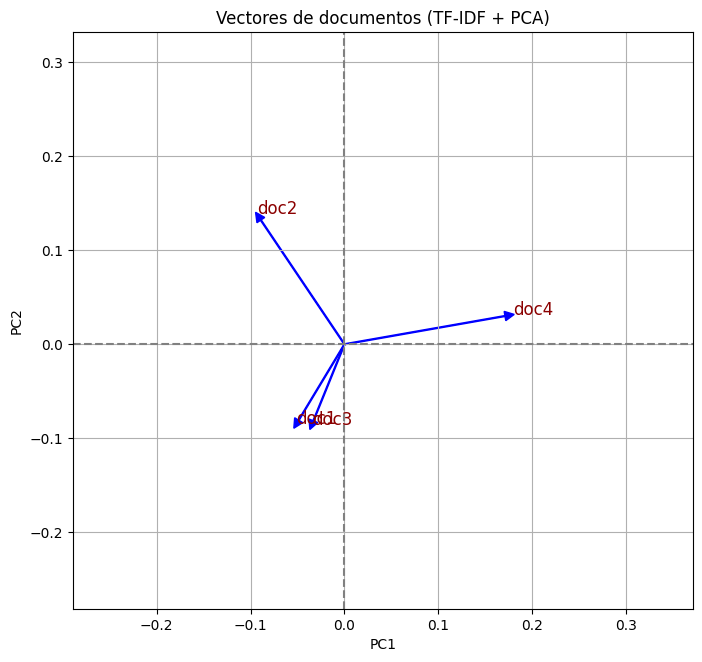

In [148]:
# 3. 
# 2D
def grafica_2D(dataframe):
    import matplotlib.pyplot as plt
    from sklearn.decomposition import PCA
    
    labels = dataframe.columns.values
    
    # Reducción PCA y visualización 2D
    pca = PCA(n_components=2)
    docs_2d = pca.fit_transform(dataframe.T.values)

    print(docs_2d)
    plt.figure(figsize=(8, 8))
    ax = plt.gca()

    # Dibujar los vectores desde el origen (0,0)
    for i, vec in enumerate(docs_2d):
        ax.arrow(0, 0, vec[0], vec[1],
                head_width=0.01, head_length=0.01, fc='blue', ec='blue')
        plt.text(vec[0]*1.05, vec[1]*1.05, labels[i], fontsize=12, color='darkred')

    # Líneas de los ejes
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')

    plt.xlim(min(docs_2d[:,0]) - 0.2, max(docs_2d[:,0]) + 0.2)
    plt.ylim(min(docs_2d[:,1]) - 0.2, max(docs_2d[:,1]) + 0.2)

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Vectores de documentos (TF-IDF + PCA)")
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')  # Para que x e y tengan la misma escala
    return plt

grafica_2D(tf_idf).show()


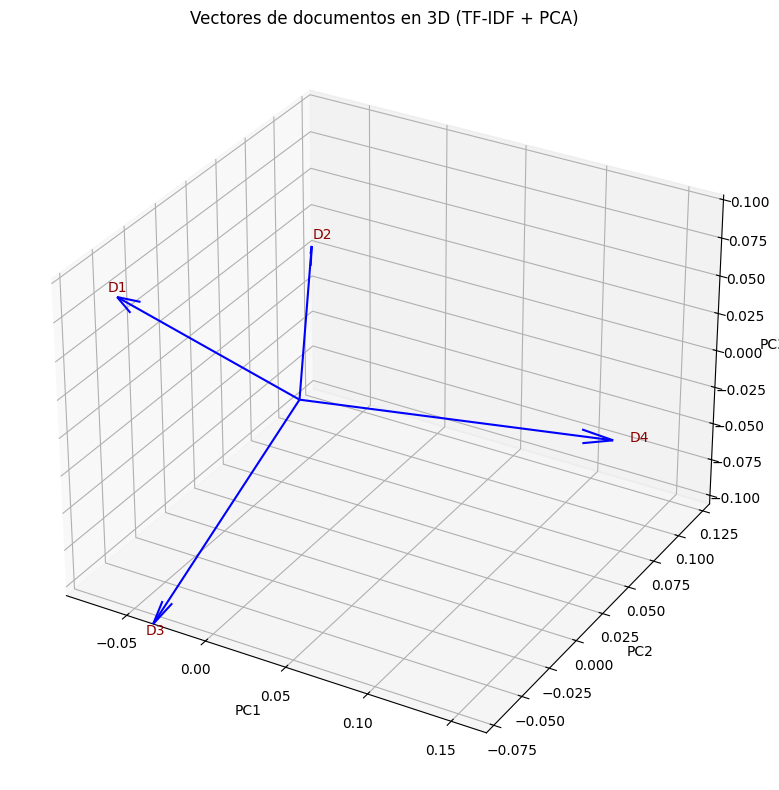

In [149]:
# 3.
# Reducción PCA y visualización 3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
docs_3d = pca.fit_transform(tf_idf.T.values)

#print(docs_3d)

# Crear figura 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar vectores desde el origen (0, 0, 0)
for i, vec in enumerate(docs_3d):
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color='blue', arrow_length_ratio=0.1)
    ax.text(vec[0]*1.05, vec[1]*1.05, vec[2]*1.05, f"D{i+1}", color='darkred', fontsize=10)

#Formatear los limites
ax.set_xlim([docs_3d[:, 0].min(),docs_3d[:, 0].max()])
ax.set_ylim([docs_3d[:, 1].min(), docs_3d[:, 1].max()])
ax.set_zlim([docs_3d[:, 2].min(), docs_3d[:, 2].max()])

# Etiquetas de los ejes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Vectores de documentos en 3D (TF-IDF + PCA)")

# Mejorar visualización
ax.grid(True)
plt.tight_layout()
plt.show()


## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

In [150]:
#1. 
#Query como cadena de texto
query = "El gato"

In [151]:
# 2. 
# representación vectorial de la query
import pandas as pd
query_vector = []

terminos_query = query.lower().split(" ")
for termino in diccionario:
    count =  terminos_query.count(termino)
    query_vector.append(count)

print(query_vector)

query_frame = pd.DataFrame(data=[query_vector], columns=list(diccionario), index=["query"])
print(query_frame.T)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
            query
jugaron         0
escondió        0
cómoda          0
de              0
la              0
gato            1
se              0
estaba          0
cama            0
jardín          0
el              1
importante      0
debajo          0
limpia          0
y               0
limpieza        0
es              0
perro           0
en              0
del             0


In [152]:
#TF
query_total = query_frame.sum(axis=1)
query_ts = query_frame.div(query_total, axis=0)

print(query_ts)


       jugaron  escondió  cómoda   de   la  gato   se  estaba  cama  jardín  \
query      0.0       0.0     0.0  0.0  0.0   0.5  0.0     0.0   0.0     0.0   

        el  importante  debajo  limpia    y  limpieza   es  perro   en  del  
query  0.5         0.0     0.0     0.0  0.0       0.0  0.0    0.0  0.0  0.0  


In [153]:
# 2. 
# TF - IDF -> query
query_tf_ids = query_ts.mul(idf, axis=1)
print(query_tf_ids.T)

               query
jugaron     0.000000
escondió    0.000000
cómoda      0.000000
de          0.000000
la          0.000000
gato        0.150515
se          0.000000
estaba      0.000000
cama        0.000000
jardín      0.000000
el          0.150515
importante  0.000000
debajo      0.000000
limpia      0.000000
y           0.000000
limpieza    0.000000
es          0.000000
perro       0.000000
en          0.000000
del         0.000000


In [154]:
# generar una función para automatizar el cálculo de tf_idf
def calcular_tf_idf_to_query (query, diccionario, idf):
    labels=generar_labels([query], "query")

    matriz_td = generar_matriz_termino_documento([query], diccionario, labels)
    tf = calcular_tf(matriz_td)
    return calcular_tf_idf(tf, idf)


calcular_tf_idf_to_query(query, diccionario, idf)

,query
jugaron,0.000000
escondió,0.000000
cómoda,0.000000
de,0.000000
la,0.000000
gato,0.150515
se,0.000000
estaba,0.000000
cama,0.000000
jardín,0.000000


In [155]:
# 3.
import numpy as np
#Calcula similitud coseno entre la consulta y cada documento.
# cos(a) = p.q/|p||q|
similitud_cos_a = pd.DataFrame(columns=tf_idf.columns, index=query_tf_ids.index)

mod_query = np.linalg.norm(query_tf_ids.values, axis=1)
#print(mod_query)
#Para productos puntos
for doc in tf_idf.columns: 
    pq = tf_idf[doc].values @ query_tf_ids.T.values
    mod_doc = np.linalg.norm(tf_idf[doc].values, axis=0)
    
    cos_a = pq/(mod_query*mod_doc)
    #print(cos_a)

    similitud_cos_a.loc[query_tf_ids.index.values[0], doc] = cos_a

print(similitud_cos_a)  


                      doc1 doc2                doc3 doc4
query  0.32298205001644176  0.0  0.5773502691896257  0.0


[-0.0385475  -0.08884405]


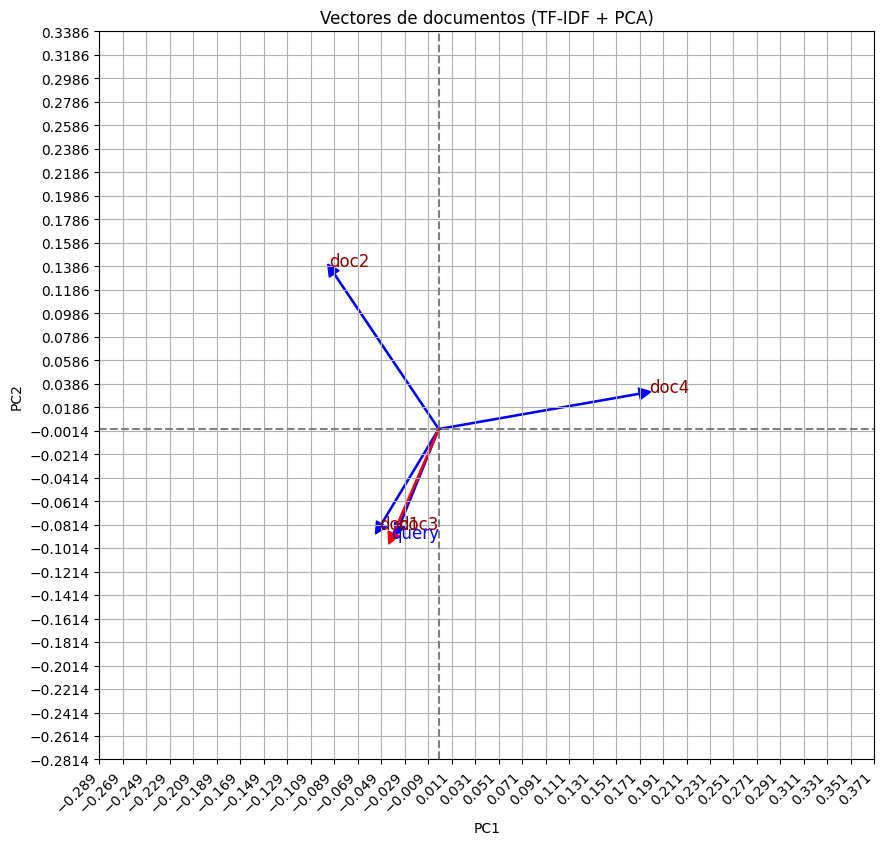

In [156]:
# 4. 
#Para la visualización es necesario usar PCA para reducir el tamanio a dos dimensiones
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

labels_docs = tf_idf.columns.values
label_query = query_tf_ids.index.values
#print(labels)

# Reducción PCA y visualización 2D
pca = PCA(n_components=2)

docs_2d = pca.fit_transform(tf_idf.T.values)

query_2d = pca.transform(query_tf_ids.values).squeeze()
print(query_2d)


plt.figure(figsize=(10, 10))
ax = plt.gca()

plt.xlim(min(docs_2d[:,0]) - 0.2, max(docs_2d[:,0]) + 0.2)
plt.ylim(min(docs_2d[:,1]) - 0.2, max(docs_2d[:,1]) + 0.2)
step = 0.02
#establecer step
plt.xticks(np.arange(min(docs_2d[:,0]) - 0.2, max(docs_2d[:,0]) + 0.2 + step, step), rotation=45, ha='right')
plt.yticks(np.arange(min(docs_2d[:,1]) - 0.2, max(docs_2d[:,1]) + 0.2 + step, step))

# Dibujar los vectores desde el origen (0,0)
for i, vec in enumerate(docs_2d):
    ax.arrow(0, 0, vec[0], vec[1],
            head_width=0.01, head_length=0.01, fc='blue', ec='blue')
    plt.text(vec[0]*1.05, vec[1]*1.05, labels_docs[i], fontsize=12, color='darkred')

# Para graficar la query
ax.arrow(0, 0, query_2d[0], query_2d[1],
            head_width=0.01, head_length=0.01, fc='red', ec='red')
plt.text(query_2d[0]*1.05, query_2d[1]*1.05, label_query[0], fontsize=12, color='blue')
# Líneas de los ejes
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')


plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Vectores de documentos (TF-IDF + PCA)")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box') 


## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`

In [157]:
# p.q entre vectores en dataframe
def producto_punto (v1, v2):
    return v1.values @ v2.values

# módulo de vector usando numpy y dataframe
def modulo_vector (v1, axis=0):
    return np.linalg.norm(v1.values, axis=axis)

# docs_vec -> documentos en columnas
# query_vec -> query en columna
#retorna dataframe query*docs
def similitud_coseno (docs_vec, query_vec):
    sim_a = pd.DataFrame(columns=docs_vec.columns, index=query_vec.columns)

    mod_query = modulo_vector(query_vec, axis=0)
   
    for doc in docs_vec.columns:
        pq = producto_punto(docs_vec[doc], query_vec)
        mod_doc = modulo_vector(docs_vec[doc], axis=0)
        
        cos_a = pq / (mod_query*mod_doc)
        sim_a.loc[query_vec.columns.values[0], doc] = cos_a

    return sim_a

# consulta con similitud coseno, retorna indice y valor de similitud en orden descendente
def consulta_similitud_coseno (docs_vec, query_vec, ascending=False):
    similitud_cos = similitud_coseno(docs_vec, query_vec)
    sim_cos_ordenado = similitud_cos.loc[query_vec.columns.values[0]].sort_values(ascending=ascending)

    #print(sim_cos_ordenado)
    #obtener los indices de los documentos
    indice_similitud = []
    for val in sim_cos_ordenado.index:
        indice_doc = similitud_cos.columns.get_loc(val)
        similitud_value = sim_cos_ordenado[val].item()
        indice_similitud.append((indice_doc, similitud_value))
    
    return indice_similitud

def presentar_resultado (query, docs, indice_similitud):
    print(f"Query: {query}")
    print("Resultados")
    for indice, similitud in indice_similitud:
        print(f"Documento [{indice+1}]:")
        print(f"\tSimilitud: {round(similitud,2)}")
        print(f"\tContenido: {docs[indice]}")

docs = documents.copy()
diccionario = generar_diccionario(docs)
query = "jardín perro"

docs_vec_tfidf, tf, idf = calcular_tf_idf_per_docs(docs)
query_vec_tf_idf = calcular_tf_idf_to_query(query, diccionario, idf)

indice_similitud = consulta_similitud_coseno(docs_vec_tfidf, query_vec_tf_idf)

presentar_resultado(query, docs, indice_similitud)


Query: jardín perro
Resultados
Documento [3]:
	Similitud: 0.46
	Contenido: El perro y el gato jugaron en el jardín.
Documento [4]:
	Similitud: 0.11
	Contenido: La limpieza del jardín es importante.
Documento [1]:
	Similitud: 0.0
	Contenido: El gato se escondió debajo de la cama.
Documento [2]:
	Similitud: 0.0
	Contenido: La cama estaba limpia y cómoda.


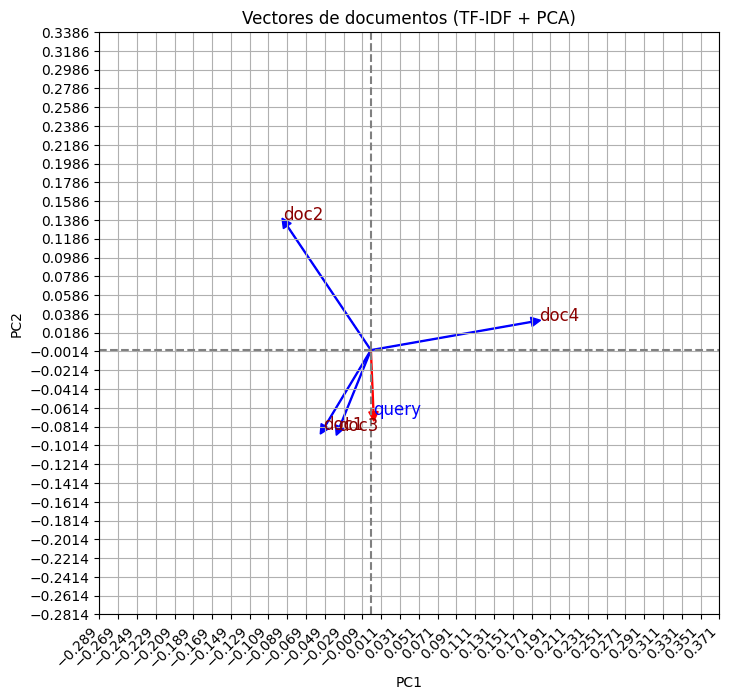

In [158]:
#Dibujar los vectores de documentos y consulta -> para ello se usa la representación TF-IDS
def graficar_vecs_docs_query (docs, query):
    import matplotlib.pyplot as plt
    from sklearn.decomposition import PCA

    labels_docs = docs.columns.values
    label_query = query.columns.values
    #print(labels)

    # Reducción PCA y visualización 2D
    pca = PCA(n_components=2)

    docs_2d = pca.fit_transform(docs.T.values)  # es necesario siempre entrenar el modelo con los mismos datos, sin aumentar columnas par que se obtenga una base consistente
    query_2d = pca.transform(query.T.values).squeeze()

    plt.figure(figsize=(8, 8))
    ax = plt.gca()

    #Set min y max 
    todos_los_puntos = np.vstack([docs_2d, query_2d])

    x_min, x_max = todos_los_puntos[:, 0].min(), todos_los_puntos[:, 0].max()
    y_min, y_max = todos_los_puntos[:, 1].min(), todos_los_puntos[:, 1].max()


    plt.xlim(x_min - 0.2, x_max + 0.2)
    plt.ylim(y_min- 0.2, y_max + 0.2)
    step = 0.02
    #establecer step
    plt.xticks(np.arange(x_min - 0.2,  x_max + 0.2 + step, step), rotation=45, ha='right')
    plt.yticks(np.arange(y_min - 0.2, y_max + 0.2 + step, step))

    # Dibujar los vectores desde el origen (0,0)
    for i, vec in enumerate(docs_2d):
        ax.arrow(0, 0, vec[0], vec[1],
                head_width=0.01, head_length=0.01, fc='blue', ec='blue')
        plt.text(vec[0]*1.05, vec[1]*1.05, labels_docs[i], fontsize=12, color='darkred')

    # Para graficar la query
    ax.arrow(0, 0, query_2d[0], query_2d[1],
                head_width=0.01, head_length=0.01, fc='red', ec='red')
    plt.text(query_2d[0]*1.05, query_2d[1]*1.05, label_query[0], fontsize=12, color='blue')

    # Líneas de los ejes
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')


    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Vectores de documentos (TF-IDF + PCA)")
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box') 

graficar_vecs_docs_query(docs_vec_tfidf, query_vec_tf_idf)


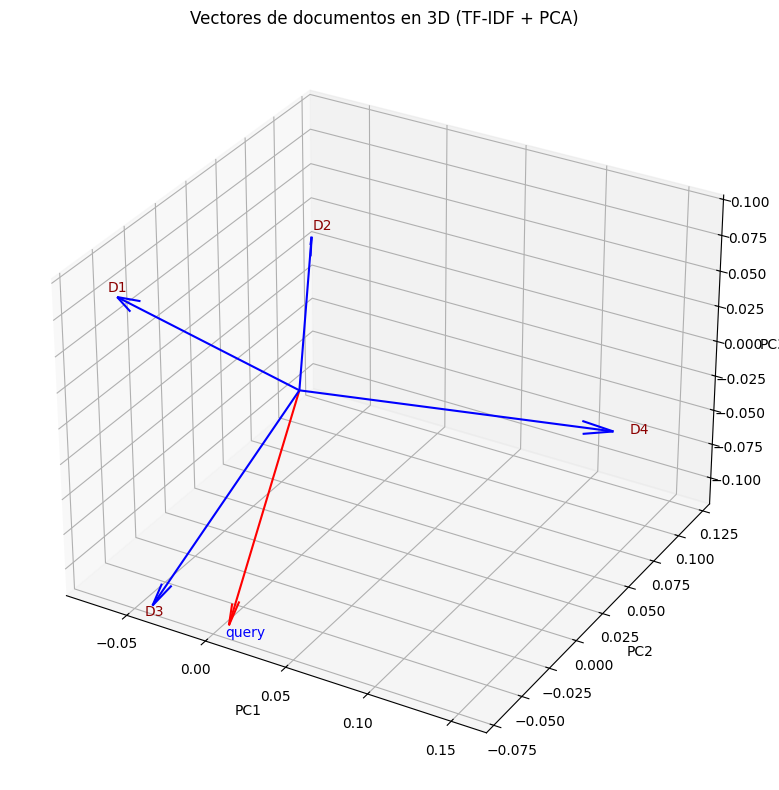

In [159]:
# Reducción PCA y visualización 3D
def graficar_vecs_docs_query_3D (docs, query):
    import matplotlib.pyplot as plt
    from sklearn.decomposition import PCA

    pca = PCA(n_components=3)
    docs_3d = pca.fit_transform(docs.T.values)
    query_3d = pca.transform(query.T.values).squeeze()

    # Crear figura 3D
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Dibujar vectores desde el origen (0, 0, 0)
    for i, vec in enumerate(docs_3d):
        ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color='blue', arrow_length_ratio=0.1)
        ax.text(vec[0]*1.05, vec[1]*1.05, vec[2]*1.05, f"D{i+1}", color='darkred', fontsize=10)

    # Dibujar la query
    ax.quiver(0, 0, 0, query_3d[0], query_3d[1], query_3d[2], color='red', arrow_length_ratio=0.1)
    ax.text(query_3d[0]*1.05, query_3d[1]*1.05, query_3d[2]*1.05, f"query", color='blue', fontsize=10)


    #Formatear los limites
    todos_los_puntos = np.vstack([docs_3d, query_3d])
    
    ax.set_xlim([todos_los_puntos[:, 0].min(),todos_los_puntos[:, 0].max()])
    ax.set_ylim([todos_los_puntos[:, 1].min(), todos_los_puntos[:, 1].max()])
    ax.set_zlim([todos_los_puntos[:, 2].min(), todos_los_puntos[:, 2].max()])

    # Etiquetas de los ejes
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title("Vectores de documentos en 3D (TF-IDF + PCA)")

    # Mejorar visualización
    ax.grid(True)
    plt.tight_layout()
    plt.show()

graficar_vecs_docs_query_3D(docs_vec_tfidf,query_vec_tf_idf)

